# Identifying Outlier Samples within Projects

In [118]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [139]:
data = pd.read_csv('./ERP000546_genecounts.txt',sep='\t',index_col=0)

In [140]:
data_normcounts = data/data.sum()

In [141]:
log_normcounts = np.log2(data_normcounts+1)

In [142]:
df = log_normcounts.loc[[i for i in list(log_normcounts.index) if '_' not in i]]

In [143]:
df_corrmat = df.corr(method='spearman')

/Users/danielsprague/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


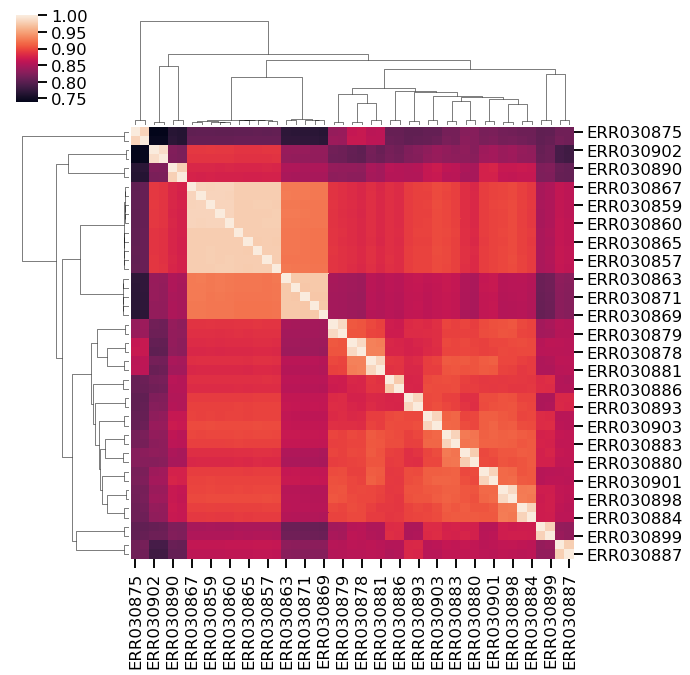

In [168]:
sns.set_context('talk',font_scale=1)
sns.clustermap(df_corrmat)
plt.tight_layout()
plt.savefig('./cluster_spearman.pdf',bbox_inches='tight')

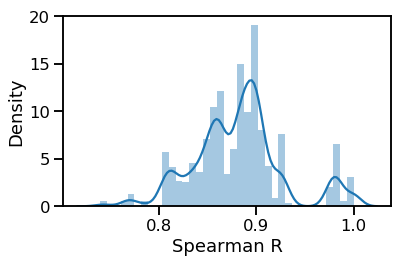

In [170]:
sns.distplot(df_corrmat.values.flatten())
plt.xlabel('Spearman R')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('./spearman_distribution.pdf',bbox_inches='tight')

# Identifying Unique Samples within a Project through PCA

In [146]:
from sklearn.decomposition import PCA

p = PCA(n_components=10)
df = df.T
fit = p.fit(df)

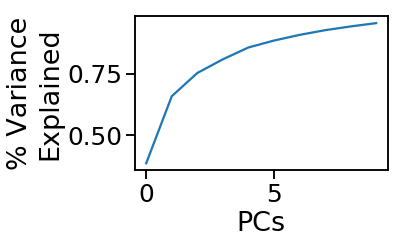

In [171]:
sns.set_context('talk',font_scale=1.5)
plt.plot(np.cumsum(fit.explained_variance_ratio_))
plt.xlabel('PCs')
plt.ylabel('% Variance\nExplained')
plt.tight_layout()
plt.savefig('./varexp.pdf',bbox_inches='tight')

In [148]:
pca_two = PCA(2)
projected = pca_two.fit_transform(df)

In [187]:
import matplotlib

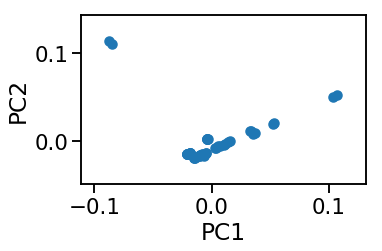

In [192]:
sns.set_context('talk',font_scale=1.3)
plt.scatter(projected[:,0],projected[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.savefig('./PC1_2.pdf',bbox_inches='tight')

In [194]:
(dist_mean + 2*dist_std)

0.0976374722642232

In [160]:
def centeroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return sum_x/length, sum_y/length

In [161]:
centroid = centeroidnp(projected)
dist = [np.linalg.norm(i-centroid) for i in projected]

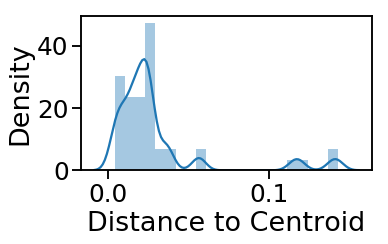

In [175]:
sns.set_context('talk',font_scale=1.5)
sns.distplot(dist)
plt.xlabel('Distance to Centroid')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('./dist_of_dists.pdf',bbox_inches='tight')

In [163]:
dist_std = np.std(dist)

In [164]:
dist_mean = np.mean(dist_std)

In [165]:
dist = np.array(dist)

In [182]:
outlier_removed = projected[np.nonzero(~(dist > (dist_mean + 2*dist_std)))]

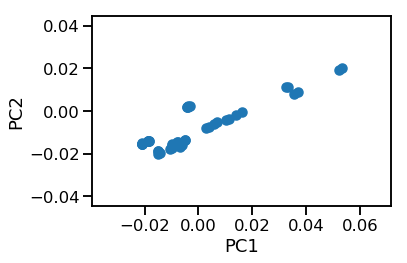

In [184]:
sns.set_context('talk',font_scale=1)
plt.scatter(outlier_removed[:,0],outlier_removed[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.savefig('./outliers_removed_PC1_2.pdf',bbox_inches='tight')